# Inaugural Project

Group: importnumpyasnp 

Member: Alexandros Bøgeskov-Tsoronis (xbj793)

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [481]:
import numpy as np
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

Consider a consumer solving the following maximization problem:

$$
\begin{aligned}
c^\star, {l}^\star = \arg \max_{c,l} \log (c) - \nu\frac{{l}^{1+\frac{1}{\epsilon}}}{{1+\frac{1}{\epsilon}}}  \\
 \text{s.t.}\\
 {x} & = m + wl - [\tau_{0}wl + \tau_{1}\max\{wl -\kappa,0\}]\\
   c & \in [0,x]\\
   l &\in [0,1]\\
\end{aligned}
$$

**Idea:** is to solve the maximization problem using the packages numpy and scipy where the functions log and optimize is called to help solving the problem. First we choose the parameter values for which we will maximize consumption (c) and labor supply (${l}$). Then we define the constraint which is the total resources and the utility function so that we can define the objective which is to maximize the utility subject to the constraint. Then we call the optimizer where we set the method to bounded and the bounds to (0,1) since $ l \in [0,1] $. NOTE: since utility is monotonically increasing in consumption $c^\star={x}$ we set c equal to the constraint in the objective function:

Setting **parameters**:

In [482]:
#Setting parameters from:
#https://nbviewer.jupyter.org/github/NumEconCopenhagen/lectures-2020/blob/master/projects/InauguralProject.pdf
m = 1
v = 10
epsilon = 0.3
tau_0 = 0.4
tau_1 = 0.1
kappa = 0.4
w = 1

Defining **functions**:

In [483]:
#The utility function.
def utility(l,c,v,epsilon):
    return np.log(c)-v*l**(1+1/epsilon)/(1+1/epsilon)

#The constraint function which is the total resources. 
def constraint(m,w,l,tau_0,tau_1,kappa):
    return m+w*l-(tau_0*w*l+tau_1*max(w*l-kappa,0))

#The consumer objective we want to maximize
def objective(l,w,epsilon,v,tau_0,tau_1,kappa):
    c = constraint(m,w,l,tau_0,tau_1,kappa)
    return -utility(l,c,v,epsilon)

Calling **solver**:

In [488]:
#Calling the solver where we use the optimize function from scipy
def lsp_optimizer(w,epsilon,v,m,tau_0,tau_1,kappa):
    solution = optimize.minimize_scalar(objective,
    method='bounded',
    bounds=(0,1),
    args = (w,epsilon,v,tau_0,tau_1,kappa))
    l = solution.x
    c = constraint(m,w,tau_0,tau_0,tau_1,kappa)
    u = utility(l,c,v,epsilon)
    return l, c, u

#Print the solution
print("l =  " + str(l))
print("c =  " + str(c))
print("u =  " + str(u))

l =  0.4000006819648221
c =  1.2399999999999998
u =  0.17158280893977826


# Question 2

Plotting $l^\star$ and $c^\star$ as functions of w in the range 0.5 to 1.5.

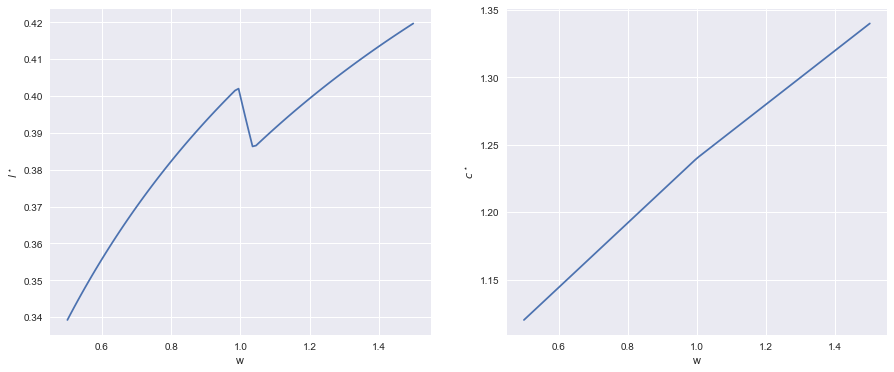

In [508]:
#plot style and size
plt.style.use('seaborn') 
fig = plt.figure(figsize=(15,6))

#Using linspace to create sequences of evenly spaced values within the interval.
N = 100
w_vec = np.linspace(0.5,1.5,N)
l_vec = np.empty(N)
c_vec = np.empty(N)

#between 0.5 to 1.5, selecting the optimal consumption and labor supply 
for i, w in enumerate(w_vec):
    l_vec[i] = lsp_optimizer(w,epsilon,v,m,tau_0,tau_1,kappa)[0]
    c_vec[i] = lsp_optimizer(w,epsilon,v,m,tau_0,tau_1,kappa)[1]


# l. plot 
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec)
ax_left.set_xlabel('w')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# 2. plot 
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_vec)
ax_right.set_xlabel('w')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

# Question 3

Consider a population with N = 10,000 individuals indexed by i and we assume that the distribution of wages is uniform such that $w_{i} ∼ U(0.5,1.5)$.
We calculate the total tax revenue:

In [509]:
#Setting population, random seed and the distribution of wages
N=10000
np.random.seed(123)
w_uniform = np.random.uniform(0.5,1.5,N)

#Getting tax for each N
for i in w_uniform:
    l = solution.x
    tau = tau_0*w_uniform*l+tau_1*np.max(w_uniform*l-k,0)
    
#Sum tax and print it
total_tau = np.sum(tau)
print("Total tax revenue =  " + str(total_tau))

Total tax revenue =  1797.1296042213153


# Question 4

What would the tax revenue be if instead ε = 0.1?

In [476]:
#Now we set epsilon to 0.1
N = 10000
np.random.seed(123)
w = np.random.uniform(0.5,1.5,N)
epsilon = 0.1

#for loop to get each N' labor supply with wage rate uniformly distributed from (0.5,1.5).
for i in w:
    
    def objective(l,m,i,epsilon,v,tau_0,tau_1,kappa):
        c = constraint(m,i,l,tau_0,tau_1,kappa)
        return -utility(l,c,v,epsilon)
    
    solution_tau = optimize.minimize_scalar(objective,
                                        method='bounded',
                                        bounds=(0,1),
                                        args=(m,i,epsilon,v,tau_0,tau_1,kappa))
    

l = solution_tau.x
#solving for tax, sum and print total tax revenue
tau_low_frisch = tau_0*w*l+tau_1*np.max(w*l-k,0)
total_tau_low_frisch = np.sum(tau_low_frisch)
print("Total tax revenue =  " + str(total_tau_low_frisch))

Total tax revenue =  3566.9431142192743


# Question 5

ADD ANSWER.

# Conclusion

ADD CONCISE CONLUSION.